In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load data
df = pd.read_csv("dataset_med.csv")

# Drop non-informative columns
df.drop(columns=['id', 'diagnosis_date', 'end_treatment_date'], inplace=True)

# Handle missing values if any
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
encoders = {}
for col in categorical_cols:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col])
    encoders[col] = enc  # Save encoders if needed for prediction

# Split features and target
X = df.drop(columns='survived')
y = df['survived']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7776910112359551
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.87    138639
           1       0.24      0.00      0.00     39361

    accuracy                           0.78    178000
   macro avg       0.51      0.50      0.44    178000
weighted avg       0.66      0.78      0.68    178000



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from datetime import datetime

# Load the dataset
df = pd.read_csv("dataset_med.csv")

# Convert date columns to datetime
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'], errors='coerce')
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'], errors='coerce')

# Create a new feature: treatment duration in days
df['treatment_duration'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days

# Drop irrelevant or problematic columns
df.drop(columns=['id', 'country', 'diagnosis_date', 'end_treatment_date'], inplace=True)

# Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Features and target
X = df.drop(columns='survived')
y = df['survived']

# Sample if dataset is too large
if len(df) > 10000:
    sample = df.sample(n=10000, random_state=42)
    X = sample.drop(columns='survived')
    y = sample['survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

# Output the results
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1567
           1       0.50      0.01      0.01       433

    accuracy                           0.78      2000
   macro avg       0.64      0.50      0.45      2000
weighted avg       0.72      0.78      0.69      2000



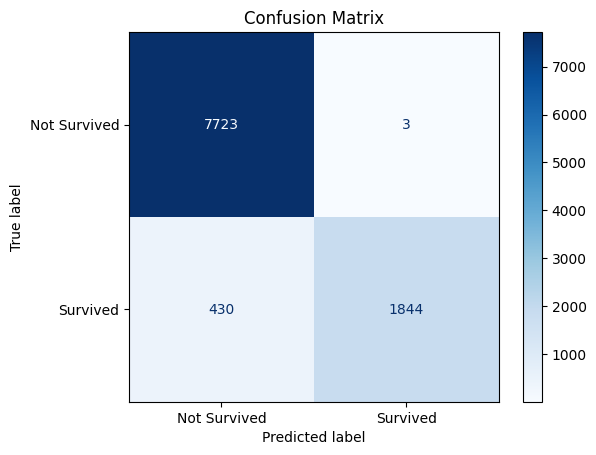

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# After making predictions:
y_pred = model.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Survived", "Survived"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
